In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Import data set 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
#describe the data

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X =df.iloc[:,0:-1]

In [14]:
y =df['Outcome']

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Model Building

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [19]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
366,6,124,72,0,0,27.6,0.368,29
301,2,144,58,33,135,31.6,0.422,25
382,1,109,60,8,182,25.4,0.947,21
140,3,128,78,0,0,21.1,0.268,55


In [20]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

In [21]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 576, dtype: int64

In [22]:
Lg = LogisticRegression()

In [23]:
Lg.fit(X_train,y_train)

y_pred = Lg.predict(X_test)

In [24]:
confusion_matrix(y_test,y_pred)

array([[115,  15],
       [ 25,  37]], dtype=int64)

In [25]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100

sns.set_style('darkgrid')

Text(97.72222222222221, 0.5, 'Actual Values')

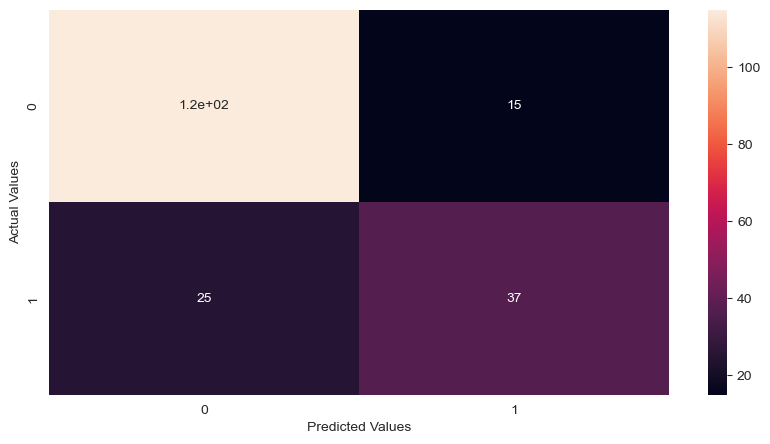

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



In [28]:
#compare the prediction of the model

In [29]:
print(y_test[:30].values)
print(y_pred[:30])

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0]


In [30]:
#select the probability of records being the class 1

In [31]:
probab = Lg.predict_proba(X_test)

In [32]:
probab

array([[0.02569162, 0.97430838],
       [0.83977987, 0.16022013],
       [0.92321812, 0.07678188],
       [0.31950705, 0.68049295],
       [0.87805608, 0.12194392],
       [0.966181  , 0.033819  ],
       [0.19576947, 0.80423053],
       [0.10323456, 0.89676544],
       [0.49010732, 0.50989268],
       [0.63503014, 0.36496986],
       [0.35800154, 0.64199846],
       [0.03024334, 0.96975666],
       [0.68299214, 0.31700786],
       [0.74577775, 0.25422225],
       [0.86720002, 0.13279998],
       [0.82194844, 0.17805156],
       [0.10178924, 0.89821076],
       [0.97786225, 0.02213775],
       [0.53230412, 0.46769588],
       [0.7480027 , 0.2519973 ],
       [0.3164441 , 0.6835559 ],
       [0.61085834, 0.38914166],
       [0.78295684, 0.21704316],
       [0.94159481, 0.05840519],
       [0.94956551, 0.05043449],
       [0.6425106 , 0.3574894 ],
       [0.95311146, 0.04688854],
       [0.05745515, 0.94254485],
       [0.89117384, 0.10882616],
       [0.87085782, 0.12914218],
       [0.

In [33]:
probab = Lg.predict_proba(X_test)[:,1]
probab

array([0.97430838, 0.16022013, 0.07678188, 0.68049295, 0.12194392,
       0.033819  , 0.80423053, 0.89676544, 0.50989268, 0.36496986,
       0.64199846, 0.96975666, 0.31700786, 0.25422225, 0.13279998,
       0.17805156, 0.89821076, 0.02213775, 0.46769588, 0.2519973 ,
       0.6835559 , 0.38914166, 0.21704316, 0.05840519, 0.05043449,
       0.3574894 , 0.04688854, 0.94254485, 0.10882616, 0.12914218,
       0.52659176, 0.24569764, 0.10114007, 0.50017697, 0.0898937 ,
       0.67492734, 0.49714065, 0.08539349, 0.32088161, 0.735501  ,
       0.28402875, 0.18463475, 0.16624512, 0.82727351, 0.76343288,
       0.01188183, 0.07935379, 0.19982022, 0.41692384, 0.2902857 ,
       0.39056883, 0.17188639, 0.90119676, 0.54006155, 0.12191394,
       0.00203643, 0.06020588, 0.46455678, 0.26625594, 0.0765978 ,
       0.74980773, 0.46647635, 0.09061173, 0.69937269, 0.67207635,
       0.93635851, 0.72136932, 0.13258608, 0.33720591, 0.10872369,
       0.09683381, 0.35019742, 0.08553777, 0.96747709, 0.82969

In [34]:
#plot the roc auc curve for prediction and probabilities

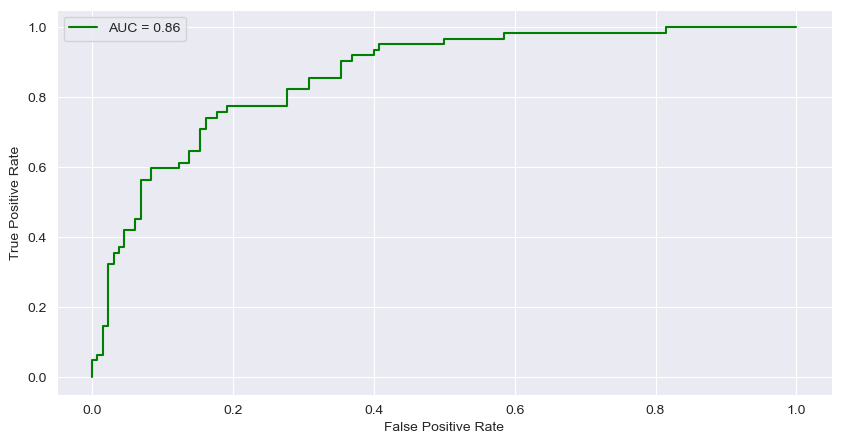

In [35]:
auc = roc_auc_score(y_test,probab)

fpr,tpr,threshold = roc_curve(y_test,probab)

plt.plot(fpr,tpr,color = 'green',label = 'AUC = %0.2f'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Select the best threshold value for the model

In [36]:
#threshold values

In [37]:
threshold

array([1.97430838, 0.97430838, 0.96975666, 0.96747709, 0.95206522,
       0.94254485, 0.89330232, 0.84898926, 0.74980773, 0.735501  ,
       0.72136932, 0.70090298, 0.69937269, 0.69886788, 0.68049295,
       0.67710851, 0.67207635, 0.67041104, 0.55779848, 0.54006155,
       0.52771603, 0.49951344, 0.49714065, 0.48250817, 0.46826768,
       0.46647635, 0.41692384, 0.40447633, 0.39277995, 0.39056883,
       0.38914166, 0.3771346 , 0.3746529 , 0.31700786, 0.2902857 ,
       0.28398385, 0.26625594, 0.24569764, 0.23024415, 0.22599425,
       0.22338535, 0.20578285, 0.20411228, 0.20122546, 0.19982022,
       0.16624512, 0.16472493, 0.13258608, 0.13166616, 0.07678188,
       0.0765978 , 0.00203643])

In [38]:
accuracy = []

for i in threshold:
    y_pred = np.where(probab>i,1,0)
    accuracy.append(accuracy_score(y_test,y_pred))
    
threshold_selection = pd.concat([pd.Series(accuracy),pd.Series(threshold)],axis=1)
threshold_selection.columns = ['Accuracy','Threshold']
threshold_selection.sort_values(by = 'Accuracy',ascending=False)

,Accuracy,Threshold
18,0.807292,0.557798
20,0.807292,0.527716
19,0.807292,0.540062
29,0.802083,0.390569
28,0.802083,0.392780
27,0.802083,0.404476
26,0.796875,0.416924
31,0.796875,0.377135
30,0.796875,0.389142
32,0.791667,0.374653


In [39]:
from sklearn.preprocessing import binarize

In [40]:
bn = binarize([probab],threshold=0.37)[0]

In [41]:
bn

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0.])

In [42]:
#check the accuracy for the model with selected threshold

In [43]:
print(classification_report(y_test,bn))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       130
           1       0.66      0.77      0.71        62

    accuracy                           0.80       192
   macro avg       0.77      0.79      0.78       192
weighted avg       0.81      0.80      0.80       192



# Thank You!